<a href="https://colab.research.google.com/github/gr-uzun/dog-breed-classification/blob/main/dog_breed_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**120 Dog Breed Classification**

Dataset: https://www.kaggle.com/datasets/amandam1/120-dog-breeds-breed-classification

In this project, you will be trying to create a model to classify the dog breeds using the dataset
given above.

The aim of the project is to classify the dog’s breed using the dataset which
consists of 120 files.

While creating the project, try to follow the instructions below and make
sure that the project is unique.

**Attention**

Before begin project, Download Kaggle Dataset directly into Google Drive (COLAB) by running **download_kaggle_dataset_into_google_drive.ipynb**

2. **Importing Required Libraries**

- Import the required libraries for the project to the Colab environment.

- Import Pandas, NumPy, Seaborn, Matplotlib, Sklearn and Tensorflow libraries for data
analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

**Download and explore the dataset**

In [2]:
import pathlib

image_folder = "/content/drive/MyDrive/Colab Notebooks/dog_breed_classification/Images/"
data_dir = pathlib.Path(image_folder)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6631


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6631 files belonging to 59 classes.
Using 5305 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6631 files belonging to 59 classes.
Using 1326 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

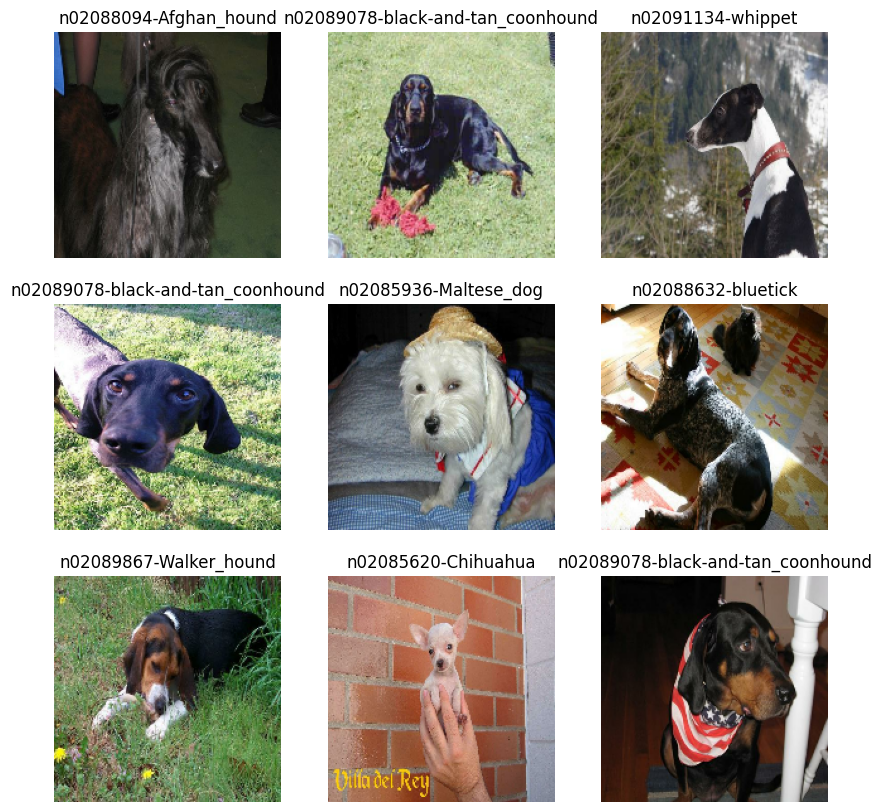

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

3. **Data Preprocessing**

- In this section, prepare the data you have, for training the model.
- Create a dataframe that includes pixel values of images and the labels
- Use Label Encoding or One-Hot Encoding techniques to deal with categorical targets.
- Split your dataset into X_train,X_test, X_val, y_train, y_test and y_val
- Normalize the pixel values.